Import packages

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import LabelEncoder

Read and view dataset

In [109]:
df= pd.read_csv("C:/Users/share/Downloads/Twiter_FinalProjectcsv.csv")
df.head()
print(df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

In [110]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Want to just view the target dataset

In [111]:
target=df["target"]
print(target)

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64


Plot the target variables in a graph

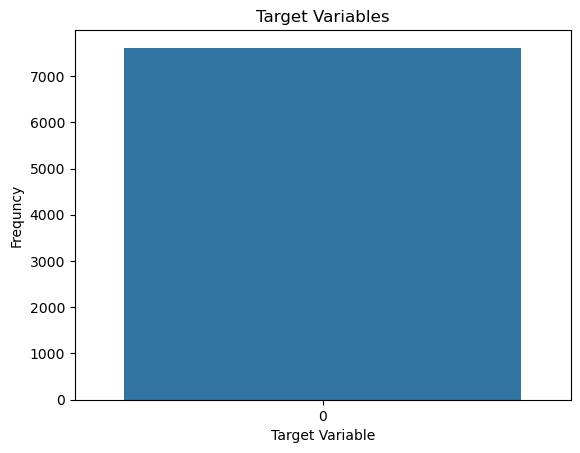

In [112]:
sns.countplot(df["target"])
plt.xlabel("Target Variable")
plt.ylabel("Frequncy")
plt.title("Target Variables")
plt.show()

Using the SK Learn Label Encoder Library, want to convert all the strings to float

In [113]:
inputs=df
le_location=LabelEncoder()
le_keyword=LabelEncoder()
le_text=LabelEncoder()

inputs["location_n"]=le_location.fit_transform(inputs['location'])
inputs["keyword_n"]=le_location.fit_transform(inputs['keyword'])
inputs["text_n"]=le_location.fit_transform(inputs['text'])
inputs.head()

,id,keyword,location,text,target,location_n,keyword_n,text_n
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,3341,221,5102
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,3341,221,3391
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,3341,221,2322
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,3341,221,658
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,3341,221,4373


Since we converted location, keyword and location to floats, we can drop the strings 

In [114]:
inputs_n=inputs.drop(["location","keyword", "text", "id"], axis="columns")

inputs_n

,target,location_n,keyword_n,text_n
0,1,3341,221,5102
1,1,3341,221,3391
2,1,3341,221,2322
3,1,3341,221,658
4,1,3341,221,4373
...,...,...,...,...
7608,1,3341,221,6467
7609,1,3341,221,1672
7610,1,3341,221,4564
7611,1,3341,221,5270


Look at values present in the target variable. 1 indicated the event is true while 0 indicates the event is false.

In [115]:
df["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

Train and test the dataframe. Split the dataset into train and test. X represent all columns except the target and y represents only the target column. 

In [116]:
X = inputs_n.iloc[:, 1:]  
Y = inputs_n.iloc[:, 0] 

Check the shape. Here we see that for X shape we have 7613 rows and 3 columns which is just the location_n, keyword_n and text_n.for Y shape we have 7613 rows which is just the target column.

In [117]:
X.shape

(7613, 3)

In [118]:
Y.shape

(7613,)

Split the dataframe in X_train, X_test and Y_train and Y_test

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=98)

Import Random Forest Classifier. Measure the Qulity of the Split using Gini Impurity. Max_depth is the maximum depth. Minimum_sample Split is the minimum number of samples to split the iternal node or branch of the tree.

In [121]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="gini", max_depth=10,min_samples_split=10,random_state=5)
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=5)

Want to see what variables are the most important in terms of percentage. From the output below location_n is 20 percent, keyword_n is 41 percent and text_n is 38 percent 

In [122]:
clf.feature_importances_

array([0.22506885, 0.39373769, 0.38119346])

Create the confusion matrix to see what classes have been created correctly and evaluate performance of model

In [123]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


actual = numpy.random.binomial(1, .9, size=5000)
predicted = numpy.random.binomial(1, .9, size=5000)


confusion_matrix = metrics.confusion_matrix(actual, predicted)

TN, FP, FN, TP = confusion_matrix.ravel()

FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (TP + FN)  # False Negative Rate
TPR = TP / (TP + FN)  # True Positive Rate or Recall
TNR = TN / (TN + FP)  # True Negative Rate or Specificity
Precision = TP / (TP + FP)  # Precision
Sensetivity= TP/(TP + FN)
Error_Rate= (FP + FN)/(TP + FP + FN + TN)
Accuracy = (TP + TN) / (TP + FP + FN + TN)  # Accuracy


# Display the metrics
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"False Positive Rate (FPR): {FPR:.3f}")
print(f"False Negative Rate (FNR): {FNR:.3f}")
print(f"Precision: {Precision:.3f}")
print(f"Sensetivity: {Sensetivity:.3f}")
print(f"Error Rate: {Error_Rate:.3f}")
print(f"Accuracy: {Accuracy:.3f}")

True Positives (TP): 4056
True Negatives (TN): 46
False Positives (FP): 461
False Negatives (FN): 437
False Positive Rate (FPR): 0.909
False Negative Rate (FNR): 0.097
Precision: 0.898
Sensetivity: 0.903
Error Rate: 0.180
Accuracy: 0.820
